In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/zoo.csv')

In [ ]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
data.shape

(101, 17)

In [ ]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


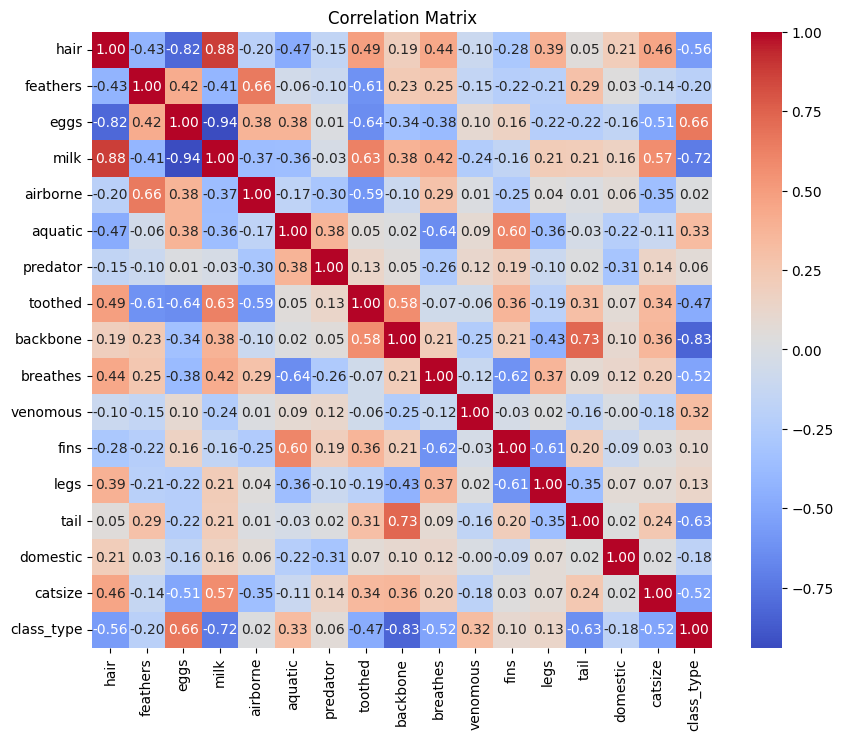

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [ ]:
data = data.drop('animal_name', axis=1)

In [ ]:
X = data.drop('class_type', axis=1)
y = data['class_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)


 In the Gaussian Naive Bayes classifier, it is assumed that the continuous-valued features follow a Gaussian (normal) distribution. This means that the probability distribution of the feature values within each class is assumed to be a Gaussian distribution.

 Gaussian Naive Bayes is particularly useful when dealing with continuous data, and it can be efficient and perform well in practice, especially when the naive independence assumption is reasonably satisfied

In [ ]:
nb_model_bb = BernoulliNB()
nb_model_bb.fit(X_train, y_train)
nb_bb_pred = nb_model_bb.predict(X_test)
nb_acc_bb= accuracy_score(y_test, nb_bb_pred)


In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.

The primary goal of an SVM is to find the optimal hyperplane that best separates data points belonging to different classes in a high-dimensional feature space.


In [ ]:
print("Naive Bayes Accuracy(Gaussian):", nb_accuracy)
print("Naive Bayes Accuracy(Bernoulli)", nb_acc_bb)
print("SVM Accuracy:", svm_accuracy)


Naive Bayes Accuracy(Gaussian): 0.9523809523809523
Naive Bayes Accuracy(Bernoulli) 0.9523809523809523
SVM Accuracy: 0.9523809523809523


<function matplotlib.pyplot.show(close=None, block=None)>

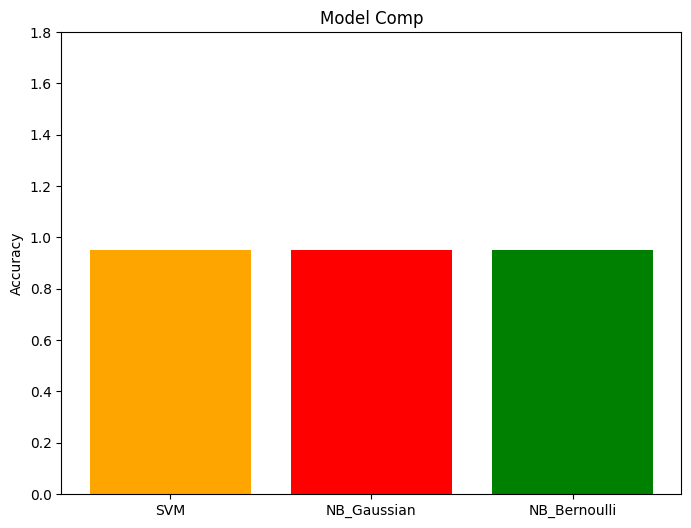

In [ ]:
models = ['SVM', 'NB_Gaussian', 'NB_Bernoulli']
accc=[svm_accuracy,nb_accuracy,nb_acc_bb]
plt.figure(figsize=(8,6))
plt.bar(models,accc,color=['orange','red','green'])
plt.ylabel('Accuracy')
plt.title('Model Comp')
plt.ylim(0,1.8)
plt.show
